In [63]:
%matplotlib inline

import numpy as np
import os
import utils
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cross_validation
import sklearn.linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D

Загружаем датасет

In [14]:
X, y = utils.load_chips()
a = X[:,0]
b = X[:,1]
print len(a)
print len(b)
print len(y)

118
118
118


Посмотрим на датасет

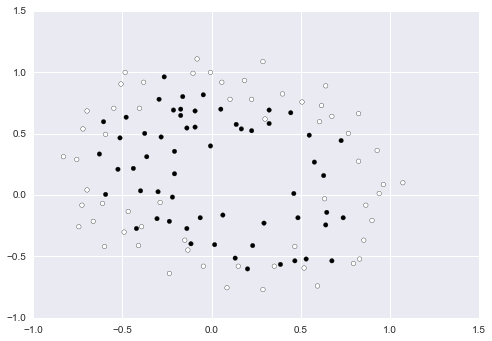

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [23]:
norm = normalize(X, axis = 0)

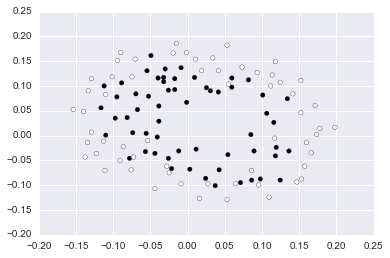

In [25]:
plt.scatter(norm[:, 0], norm[:, 1], c=y)

Определим расстояние как евклидову меру

In [51]:
def dist(x, y):
    return np.linalg.norm(x-y)

Собс-но, сам kNN

In [52]:
def predict(X, training_set, k):
    training_set.sort(key=lambda elem: dist(elem[0], X))
    summed = sum(map(lambda elem: elem[1], training_set)[:k])
    return 1 if summed > k/2 else 0
 
print predict(np.array([1, 1]), [(np.array([0, 0]), 1), (np.array([0, 1]), 1), (np.array([1, 1]), 0)], 1)

0


In [89]:
results = np.array([])
def calculate_prec_rec_f_acc(k):
    (prec, rec, f_score, acc) = (0, 0, 0, 0)
    for train, test in sklearn.cross_validation.StratifiedKFold(y, n_folds=10, shuffle=True):
        X_train, X_test, Y_train, Y_test = X[train], X[test], y[train], y[test]
        training_set = zip(X_train, Y_train)
        predicted = map(lambda x: predict(x, training_set, k), X_test)
        (p, r, f, s) = metrics.precision_recall_fscore_support(Y_test, predicted, average="binary")
        a = metrics.accuracy_score(Y_test, predicted)
        prec += p
        rec += r
        f_score += f
        acc += a
    return prec / 10, rec / 10, f_score / 10, acc / 10
        
best = 0
best_k = -1
for k in range(1, 100, 2):
    (_, _, _, a) = calculate_prec_rec_f_acc(k)
    if a > best:
        best_k = k
        best = a
print "Best K is", best_k
print "Accuracy is ", best
#   plot_regression(X_train, Y_train, X_test, Y_test, params)

Best K is 5
Accuracy is  0.746212121212
